**Women In Tech Analysis**

This is an analysis of the representation, challenges, and impact of diversity programs for women in tech, highlighting top companies, leadership diversity, STEM hiring, and common sentiments from issues faced.

**Dataset**

Data was collected from companies' public diversity reports, company statements, industry trends, news articles, and press releases about company initiatives.

**Step 1: Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Step 2: Connecting my Dataset**

In [2]:
file_path = r"C:\Users\ANASTASIA\Downloads\Copy of Women in Tech Analysis - Company Info (1).csv"

wit_data = pd.read_csv(file_path)

**Step 3: Understanding the Tables and Schema**

In [3]:
wit_data.head()

,Company,Total Tech Job,Male Tech Workers,Female Tech Workers,Percentage of Women,Leadership Representation,Estimated Pay Gap(%),Diversity Program Rating(1-5),Board Diversity(%),STEM Grad Hiring Rate(%),University Partnership Score(1 - 5),Retention Rate(%),Issues,Ratings
0,Apple,65000,48750,16250,25,32,94,4,38,32,4,70,Bias in hiring and promotion processes,9.0
1,Google,95000,71250,23750,25,32,99,4,27,35,5,72,Non-inclusive workplace cultures,9.0
2,Microsoft,112000,84000,28000,27,26,95,4,33,30,4,68,Underrepresentation in leadership roles,8.0
3,Amazon,110000,82500,27500,25,23,99,3,36,28,3,62,Lack of mentorship and sponsorship,8.0
4,Facebook(Meta),40000,30000,10000,25,33,94,4,40,33,4,65,Higher attrition rates for women,7.0


**Observations:**
    
1. Schema Analysis: This is a single CSV file rather than multiple tables. Also, it contains information about women in tech for various technology companies.
    
2. Key Fields: 
    . Company: Name of the tech company
        
    . Total Tech Job: Total number of tech jobs in the company
        
    . Male Tech Workers: Number of male tech workers
        
    . Female Tech Workers: Number of female tech workers
        
    . Percentage of Women: Percentage of women in tech roles
        
    . Leadership Representation: Likely the percentage of women in leadership roles
        
    . Estimated Pay Gap(%): The pay gap between men and women (assuming 100% means equal pay)
        
    . Diversity Program Rating(1-5): Rating of the company's diversity programs
        
    . Board Diversity(%): Percentage of diversity on the company board
        
    . STEM Grad Hiring Rate(%): Percentage of STEM graduates hired

    . University Partnership Score(1-5): Rating of the company's university partnerships

    . Retention Rate(%): Employee retention rate
        
    . Issues: Specific issues related to women in tech
        
    . Ratings: Issues rating   

In [4]:
wit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company                              30 non-null     object 
 1   Total Tech Job                       30 non-null     int64  
 2   Male Tech Workers                    30 non-null     int64  
 3   Female Tech Workers                  30 non-null     int64  
 4   Percentage of Women                  30 non-null     int64  
 5   Leadership Representation            30 non-null     int64  
 6   Estimated Pay Gap(%)                 30 non-null     int64  
 7   Diversity Program Rating(1-5)        30 non-null     int64  
 8   Board Diversity(%)                   30 non-null     int64  
 9   STEM Grad Hiring Rate(%)             30 non-null     int64  
 10  University Partnership Score(1 - 5)  30 non-null     int64  
 11  Retention Rate(%)                 

**Observations:**
    
1. We have 30 entries

2. Issues and Ratings have 18 null values

**Step 4: Data Cleaning**
     
After some research, I found out that the "Issues" and "Ratings" fields highlight the challenges contributing to the underrepresentation of women in the tech industry. The "Ratings" field provides a score, ranging from 9 to 10, indicating the prevalence of each identified issue. There are 12 distinct issues recorded, resulting in some null values within the "Issues" and "Ratings" columns.

Therefore, we are going to drop them from the main dataset as they don't relate to specific companies.

Step 1: Naming the issues

In [5]:
# Extracting the issues and ratings from the main dataset
issues_ratings = wit_data[['Issues', 'Ratings']].dropna().reset_index(drop=True)

# Creating a dictionary to number the issues
issue_mapping = {issue: i + 1 for i, issue in enumerate(issues_ratings['Issues'])}

# Here, I just created a new column with the issue number
issues_ratings['Issue_Number'] = issues_ratings['Issues'].map(issue_mapping)

# Sorting by the issue number
issues_ratings = issues_ratings.sort_values('Issue_Number')

# Printing the numbered issues and their ratings
print("\nCommon issues women face in the tech industry and their ratings:")
for _, row in issues_ratings.iterrows():
    print(f"{row['Issue_Number']}. {row['Issues']}: {row['Ratings']}/10")


Common issues women face in the tech industry and their ratings:
1. Bias in hiring and promotion processes: 9.0/10
2. Non-inclusive workplace cultures: 9.0/10
3. Underrepresentation in leadership roles: 8.0/10
4. Lack of mentorship and sponsorship: 8.0/10
5. Higher attrition rates for women: 7.0/10
6. Work-life balance challenges: 7.0/10
7. Experiences of discrimination and harassment: 7.0/10
8. Pay inequity: 6.0/10
9. Isolation and lack of representation: 6.0/10
10. Stereotypes and biases in performance evaluations: 6.0/10
11. Inadequate family leave policies: 5.0/10
12. Limited access to influential social networks: 5.0/10


Step 2: Removing the Issues and Ratings columns from the table

In [6]:
# Here, I dropped the 'Issues' and 'Ratings' columns from the main dataset

wit_data = wit_data.drop(columns=['Issues', 'Ratings'])

In [7]:
wit_data.head()

,Company,Total Tech Job,Male Tech Workers,Female Tech Workers,Percentage of Women,Leadership Representation,Estimated Pay Gap(%),Diversity Program Rating(1-5),Board Diversity(%),STEM Grad Hiring Rate(%),University Partnership Score(1 - 5),Retention Rate(%)
0,Apple,65000,48750,16250,25,32,94,4,38,32,4,70
1,Google,95000,71250,23750,25,32,99,4,27,35,5,72
2,Microsoft,112000,84000,28000,27,26,95,4,33,30,4,68
3,Amazon,110000,82500,27500,25,23,99,3,36,28,3,62
4,Facebook(Meta),40000,30000,10000,25,33,94,4,40,33,4,65


**Step 5: Data Analysis (Solving the Use Cases)**

Use Cases:
    
1. Top Companies:  Identify companies with the highest percentage of female tech workers.

2. Diversity in Leadership: Assess the representation of women in leadership roles and its correlation with overall female tech workforce.
    
3. Effectiveness of Diversity Programs: Evaluate the impact of diversity programs on female representation and retention in tech roles.
    
4. STEM Hiring and University Partnerships: Examine the hiring rates of STEM graduates and the effectiveness of university partnerships in promoting gender diversity.
    
5. Sentiment Analysis: Analyze textual data from the issues column to identify common themes and sentiments.

**Use Case 1:** Identify companies with the highest percentage of female tech workers

In [8]:
# This function provide the top 10 companies based on percentage of women
def get_top_companies(wit_data, column, n=10, ascending=False):
    return wit_data.sort_values(by=column, ascending=ascending).head(n)

top_by_women_percentage = get_top_companies(wit_data, 'Percentage of Women')
print("Top 10 companies by percentage of women:")
print(top_by_women_percentage[['Company', 'Percentage of Women']])

Top 10 companies by percentage of women:
       Company  Percentage of Women
18       Slack                   40
15    LinkedIn                   35
9   Salesforce                   35
28     Workday                   35
24     Shopify                   35
21   Pinterest                   35
13      PayPal                   35
29      Intuit                   35
8       Oracle                   30
5          IBM                   30


Visual representation of top 10 companies based on percentage of women

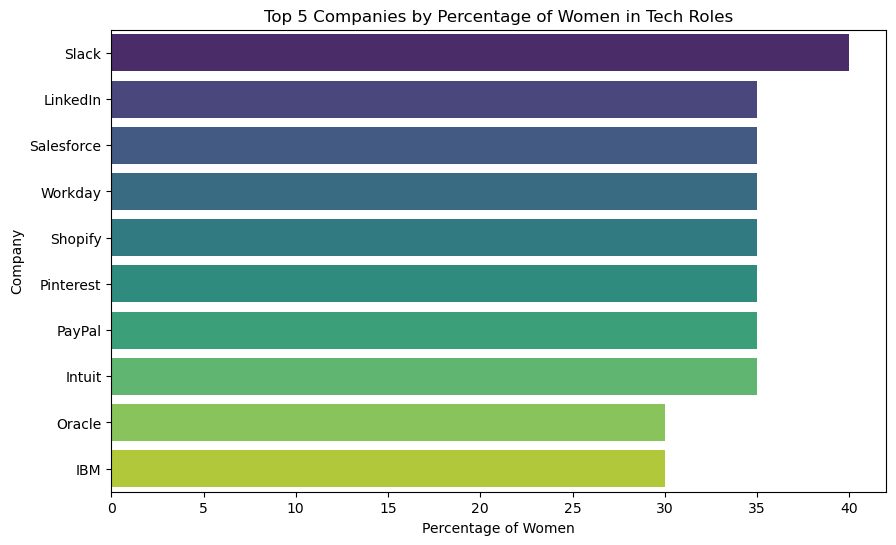

In [9]:
# Visualizing the top 10 companies data in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage of Women', y='Company', data=top_by_women_percentage, palette='viridis')
plt.title('Top 5 Companies by Percentage of Women in Tech Roles')
plt.xlabel('Percentage of Women')
plt.ylabel('Company')
plt.show()

**Summary of Use Case 1 Analysis:**
    
1. This analysis shows companies that have successfully increased the percentage of female tech workers.

2. Impact: With this analysis, I aim to inspire women to seek employment at these inclusive companies, knowing they are more likely to be supported and valued.

**Use Case 2:** Diversity in Leadership: Assess the representation of women in leadership roles and its correlation with overall female tech workforce.

Step 1: 

Leadership Representation Statistics:
count    30.000000
mean     30.900000
std       4.950444
min      22.000000
25%      28.000000
50%      30.500000
75%      33.000000
max      45.000000
Name: Leadership Representation, dtype: float64


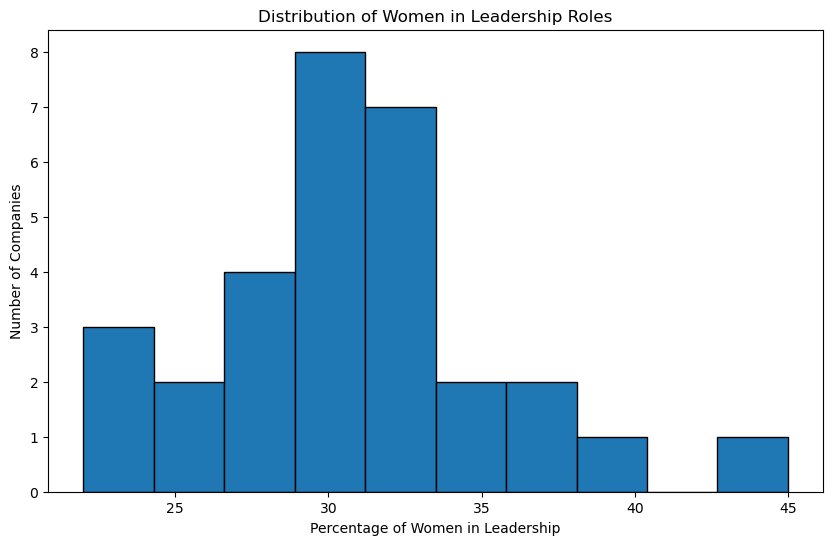

In [10]:
# First, let's look at the range and distribution of women in leadership roles, and represent it with histogram.

print("Leadership Representation Statistics:")
print(wit_data['Leadership Representation'].describe())

plt.figure(figsize=(10, 6))
wit_data['Leadership Representation'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Women in Leadership Roles')
plt.xlabel('Percentage of Women in Leadership')
plt.ylabel('Number of Companies')
plt.grid(False)
plt.show()

In [11]:
# Secondly, we'll calculate the correlation by using the Pearson correlation coefficient to quantify the relationship.

correlation = wit_data['Percentage of Women'].corr(wit_data['Leadership Representation'])
print(f"Correlation between women in tech workforce and leadership: {correlation:.2f}")

Correlation between women in tech workforce and leadership: 0.69


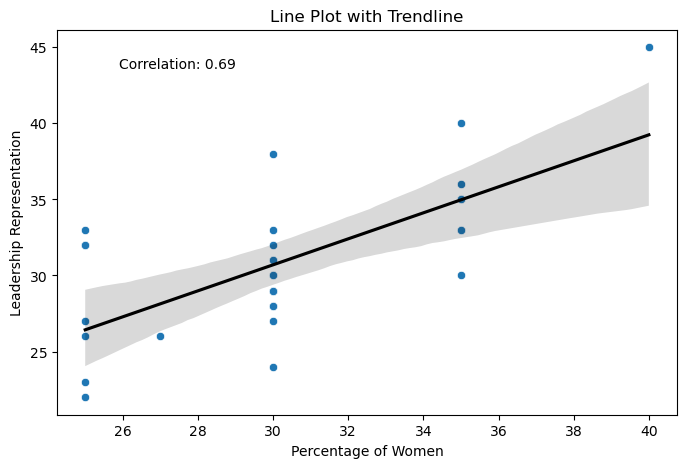

In [12]:
# Now that we have gotten the correlation coefficient, let's put it in a line plot with trendline.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Percentage of Women', y='Leadership Representation', data=wit_data)
sns.regplot(x='Percentage of Women', y='Leadership Representation', data=wit_data, scatter=False, color='black')
plt.title('Line Plot with Trendline')

# Here's to add text to the plot for more clarity
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

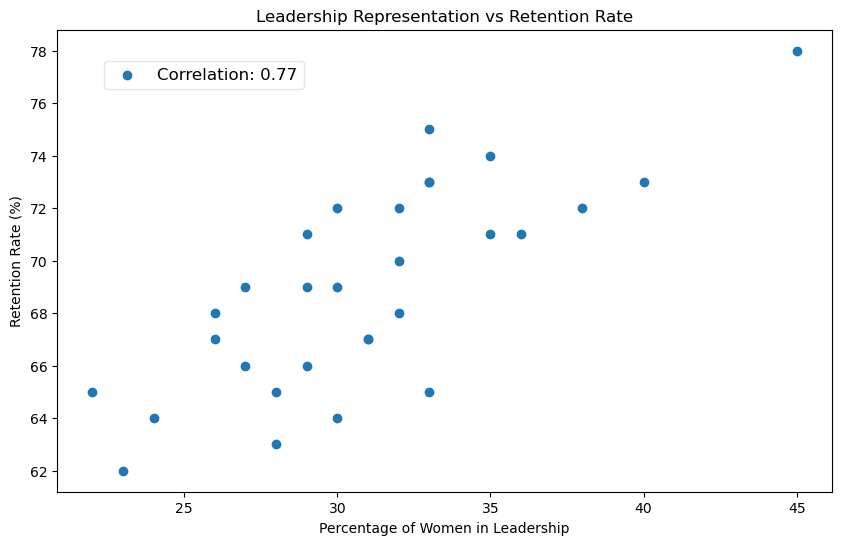

In [13]:
# Here, I just want to analyze other factors to ascertain the real effect of this leadership representation. I used retention rate.

# Calculating the correlation coefficient
correlation_retention = wit_data['Leadership Representation'].corr(wit_data['Retention Rate(%)'])

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(wit_data['Leadership Representation'], wit_data['Retention Rate(%)'], label=f'Correlation: {correlation_retention:.2f}')
plt.title('Leadership Representation vs Retention Rate')
plt.xlabel('Percentage of Women in Leadership')
plt.ylabel('Retention Rate (%)')

# Adding the legend inside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12, frameon=True, fancybox=True, framealpha=0.5)

**Summary of Use Case 2 analysis:**

1. The summary statistics gave a detailed summary of the distribution of the percentage of women in leadership roles.

2. The correlations I carried out revealed a positive link between women in tech and leadership (0.69), and between women in leadership and retention rates (0.77). 

Insights gained from Use Case 2:
    
1. The strong correlation between leadership representation and retention rate underscores the importance of having women in leadership positions. It suggests that visible leadership by women can play a crucial role in retaining female employees.

2. Both correlations highlight the positive impact of including more women in the tech workforce and leadership roles. Increasing women's representation in the workforce and leadership can have a reinforcing effect, promoting further inclusion and retention.

Finally, this analysis sheds light on the importance of having women in leadership roles and its positive correlation with the overall percentage of women in tech positions within a company.

**Use Case 3:**
    
Effectiveness of Diversity Programs: Evaluate the impact of diversity programs on female representation and retention in tech roles.

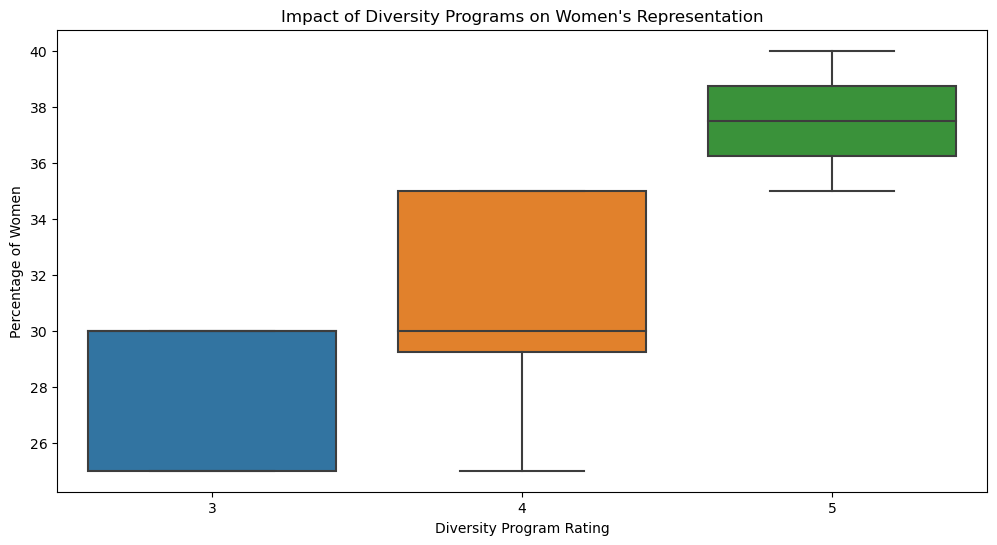

Average percentage of women by diversity program rating:
Diversity Program Rating(1-5)
3    28.333333
4    30.750000
5    37.500000
Name: Percentage of Women, dtype: float64


In [14]:
# First, let's see the relationship between Diversity Program Rating and Percentage of Women

plt.figure(figsize=(12, 6))
sns.boxplot(x='Diversity Program Rating(1-5)', y='Percentage of Women', data=wit_data)
plt.xlabel('Diversity Program Rating')
plt.ylabel('Percentage of Women')
plt.title('Impact of Diversity Programs on Women\'s Representation')
plt.show()

# Calculating average percentage of women for each diversity program rating
avg_women_by_rating = wit_data.groupby('Diversity Program Rating(1-5)')['Percentage of Women'].mean()
print("Average percentage of women by diversity program rating:")
print(avg_women_by_rating)

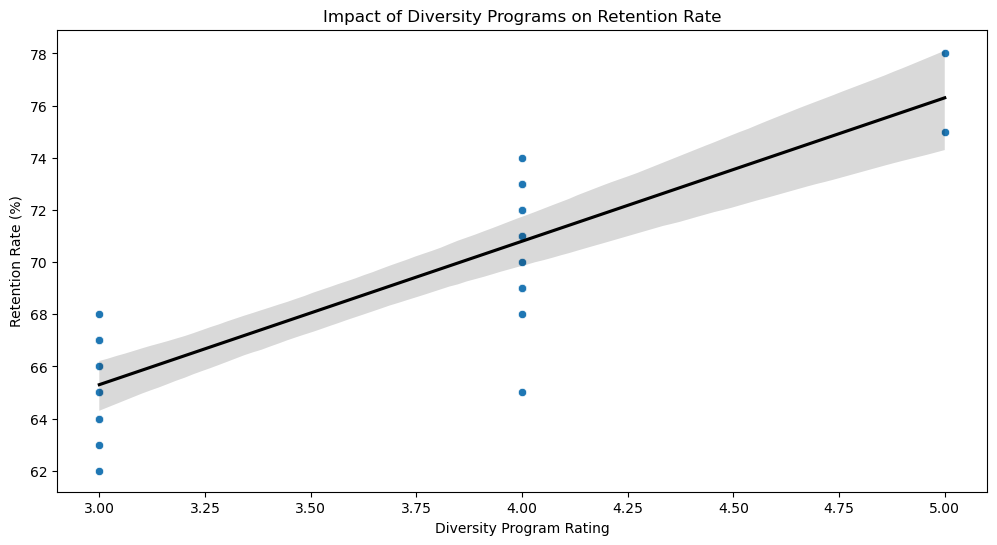


Average retention rate by diversity program rating:
Diversity Program Rating(1-5)
3    65.333333
4    70.750000
5    76.500000
Name: Retention Rate(%), dtype: float64


In [15]:
# relationship between Diversity Program Rating and Retention Rate

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Diversity Program Rating(1-5)', y='Retention Rate(%)', data=wit_data)
sns.regplot(x='Diversity Program Rating(1-5)', y='Retention Rate(%)', data=wit_data, scatter=False, color='black')
plt.xlabel('Diversity Program Rating')
plt.ylabel('Retention Rate (%)')
plt.title('Impact of Diversity Programs on Retention Rate')
plt.show()

# Calculate average retention rate for each diversity program rating
avg_retention_by_rating = wit_data.groupby('Diversity Program Rating(1-5)')['Retention Rate(%)'].mean()
print("\nAverage retention rate by diversity program rating:")
print(avg_retention_by_rating)

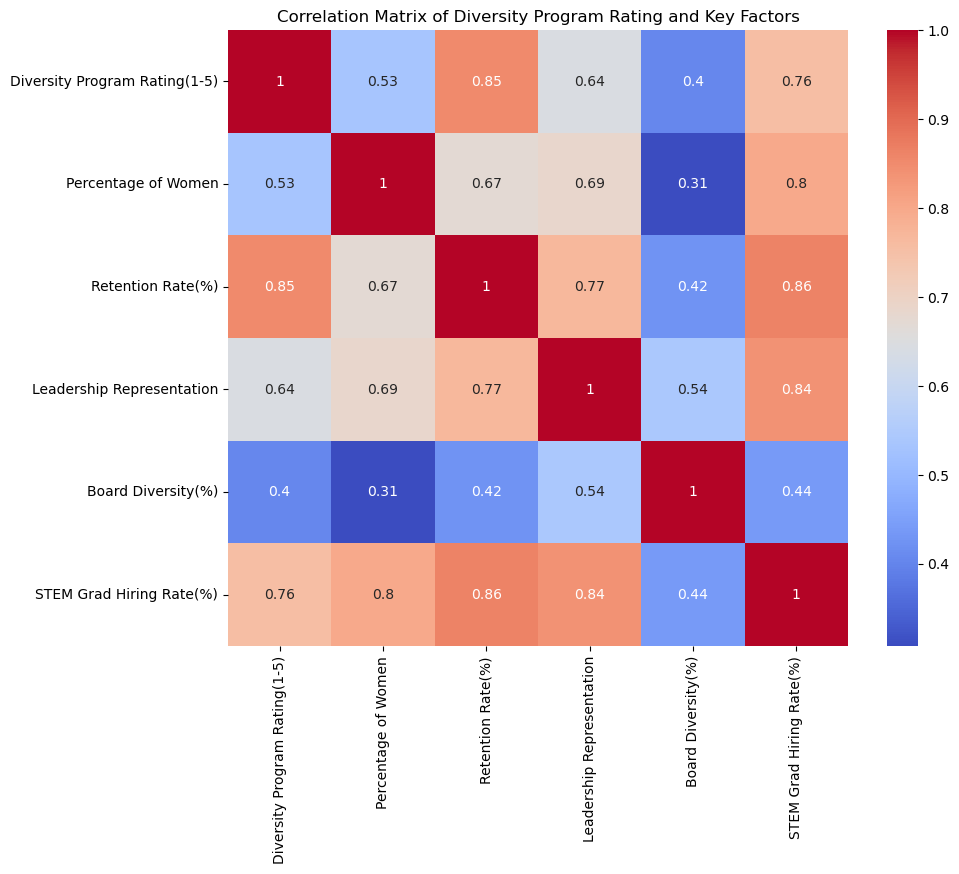

In [16]:
# correlation between Diversity Program Rating and other relevant factors

correlation_matrix = wit_data[['Diversity Program Rating(1-5)', 'Percentage of Women', 'Retention Rate(%)', 
                         'Leadership Representation', 'Board Diversity(%)', 'STEM Grad Hiring Rate(%)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diversity Program Rating and Key Factors')
plt.show()

In [17]:
# Here, I'll identify companies with the highest and lowest diversity program ratings and compare their metrics

top_companies = wit_data.nlargest(5, 'Diversity Program Rating(1-5)')
bottom_companies = wit_data.nsmallest(5, 'Diversity Program Rating(1-5)')

print("\nTop 5 companies by Diversity Program Rating:")
print(top_companies[['Company', 'Diversity Program Rating(1-5)', 'Percentage of Women', 'Retention Rate(%)']])

print("\nBottom 5 companies by Diversity Program Rating:")
print(bottom_companies[['Company', 'Diversity Program Rating(1-5)', 'Percentage of Women', 'Retention Rate(%)']])


Top 5 companies by Diversity Program Rating:
       Company  Diversity Program Rating(1-5)  Percentage of Women  \
9   Salesforce                              5                   35   
18       Slack                              5                   40   
0        Apple                              4                   25   
1       Google                              4                   25   
2    Microsoft                              4                   27   

    Retention Rate(%)  
9                  75  
18                 78  
0                  70  
1                  72  
2                  68  

Bottom 5 companies by Diversity Program Rating:
   Company  Diversity Program Rating(1-5)  Percentage of Women  \
3   Amazon                              3                   25   
6    Intel                              3                   25   
8   Oracle                              3                   30   
11  VMware                              3                   25   
12  NVIDIA

**Summary of Use Case 3 Analysis:**
    
1. Impact on Women's Representation: There's a positive correlation between Diversity Program Rating and the Percentage of Women in tech roles. Also, companies with higher diversity program ratings tend to have a higher percentage of women in tech roles.

2. Impact on Retention Rate: There's a moderate positive correlation between Diversity Program Rating and Retention Rate. Also, companies with stronger diversity programs generally have higher retention rates.
    
3. Correlation with Other Factors: Diversity Program Rating shows positive correlations with Percentage of Women, Retention Rate, Leadership Representation, Board Diversity, and STEM Grad Hiring Rate. This shows that companies investing in diversity programs are likely to see improvements across multiple diversity and inclusion metrics.

4. Top vs Bottom Companies: Companies with the highest diversity program ratings tend to have higher percentages of women in tech roles and better retention rates compared to those with the lowest ratings.
    
Finally, this analysis measures the success of diversity programs in increasing female representation and retention in tech roles.

**Use Case 4:**
    
STEM Hiring and University Partnerships: Examine the hiring rates of STEM graduates and the effectiveness of university partnerships in promoting gender diversity.


Correlation Matrix:
                                     Percentage of Women  \
Percentage of Women                             1.000000   
STEM Grad Hiring Rate(%)                        0.799332   
University Partnership Score(1 - 5)             0.424802   
Retention Rate(%)                               0.672173   

                                     STEM Grad Hiring Rate(%)  \
Percentage of Women                                  0.799332   
STEM Grad Hiring Rate(%)                             1.000000   
University Partnership Score(1 - 5)                  0.754505   
Retention Rate(%)                                    0.863350   

                                     University Partnership Score(1 - 5)  \
Percentage of Women                                             0.424802   
STEM Grad Hiring Rate(%)                                        0.754505   
University Partnership Score(1 - 5)                             1.000000   
Retention Rate(%)                               

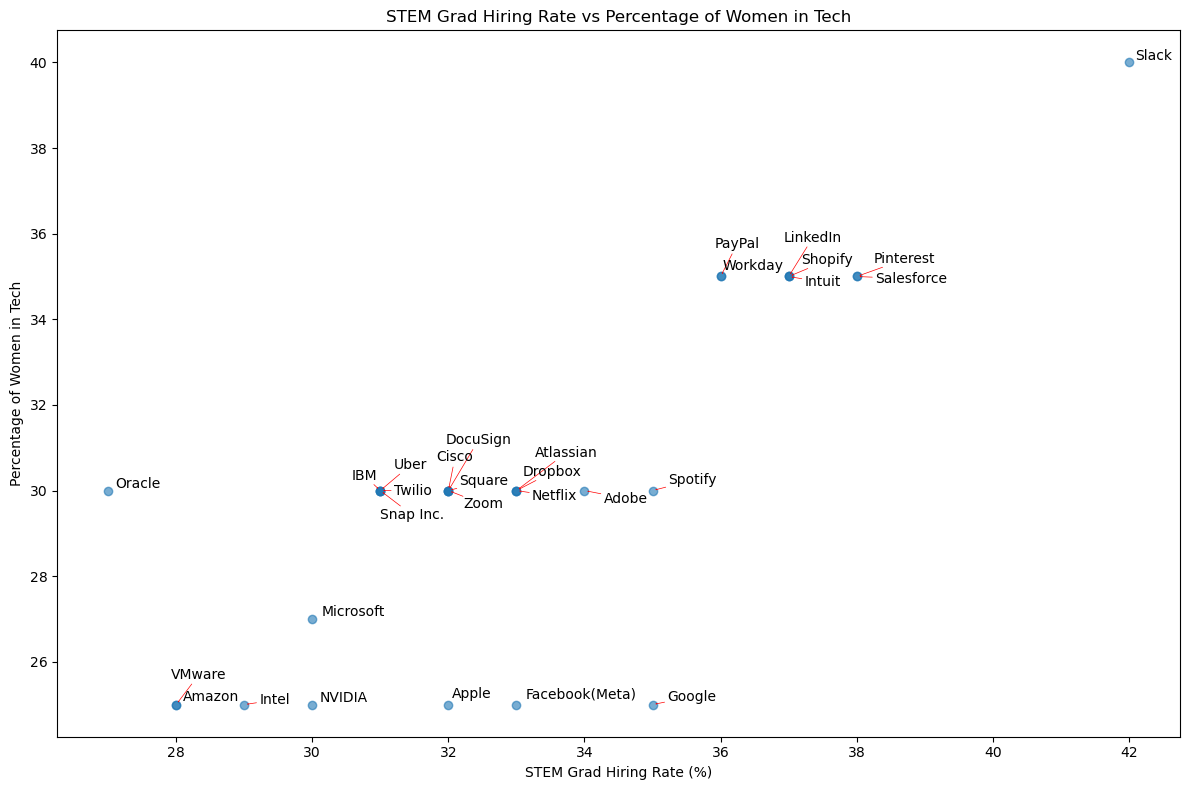

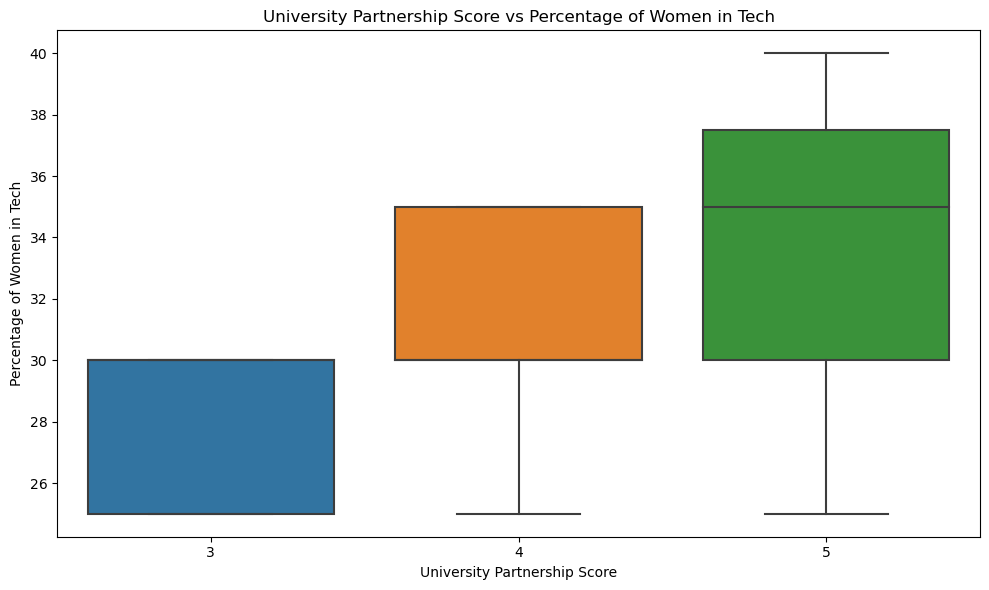

In [18]:
# I'll import adjustText because I want to include text inside the scatter plot and I don't want it to overlap each other.
from adjustText import adjust_text

# Calculating the correlations
correlation_matrix = wit_data[['Percentage of Women', 'STEM Grad Hiring Rate(%)', 'University Partnership Score(1 - 5)', 'Retention Rate(%)']].corr()

# Displaying correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(wit_data['STEM Grad Hiring Rate(%)'], wit_data['Percentage of Women'], alpha=0.6)
plt.xlabel('STEM Grad Hiring Rate (%)')
plt.ylabel('Percentage of Women in Tech')
plt.title('STEM Grad Hiring Rate vs Percentage of Women in Tech')

# Creating text labels
texts = []
for i, company in enumerate(wit_data['Company']):
    texts.append(plt.text(wit_data['STEM Grad Hiring Rate(%)'][i], wit_data['Percentage of Women'][i], company))

# Adjusting label positions to minimize overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.tight_layout()
plt.show()

# Creating a boxplot for University Partnership Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Partnership Score(1 - 5)', y='Percentage of Women', data=wit_data)
plt.xlabel('University Partnership Score')
plt.ylabel('Percentage of Women in Tech')
plt.title('University Partnership Score vs Percentage of Women in Tech')
plt.tight_layout()
plt.show()

**Summary of Use Case 4 Analysis**

1. From the above analysis, the scatter plot shows a clear positive trend between STEM Grad Hiring Rate and Percentage of Women in tech roles. Also, companies like Slack, Pinterest, Salesforce, and LinkedIn have high STEM grad hiring rates (above 35%) and also have higher percentages of women in tech roles (35-40%).

2. On the other hand, companies like Oracle, Amazon, and VMware have lower STEM grad hiring rates (below 30%) and also have lower percentages of women in tech roles (25-30%).

3. The box plot indicates that companies with higher University Partnership Scores tend to have higher percentages of women in tech roles.

4. Companies with a score of 5 (like Google, Salesforce, and Slack) generally have higher percentages of women in tech compared to those with lower scores.

5. There's a noticeable increase in the median percentage of women as the University Partnership Score increases from 3 to 5.

6. Retention Rate is positively correlated with both STEM Grad Hiring Rate and University Partnership Score, suggesting that these initiatives may contribute to better retention of women in tech roles.

7. I also observed that smaller, newer tech companies (like Slack, Pinterest, and Shopify) seem to be performing well in terms of gender diversity, often outperforming larger, more established tech giants.

Finally, this analysis examines the success of hiring practices and partnerships with universities in increasing the number of female STEM graduates entering tech roles. Also, it shows the importance of early intervention and support for women in STEM education.

**Use Case 5:**
    
Sentiment Analysis: Analyze textual data from the issues column to identify common themes and sentiments.

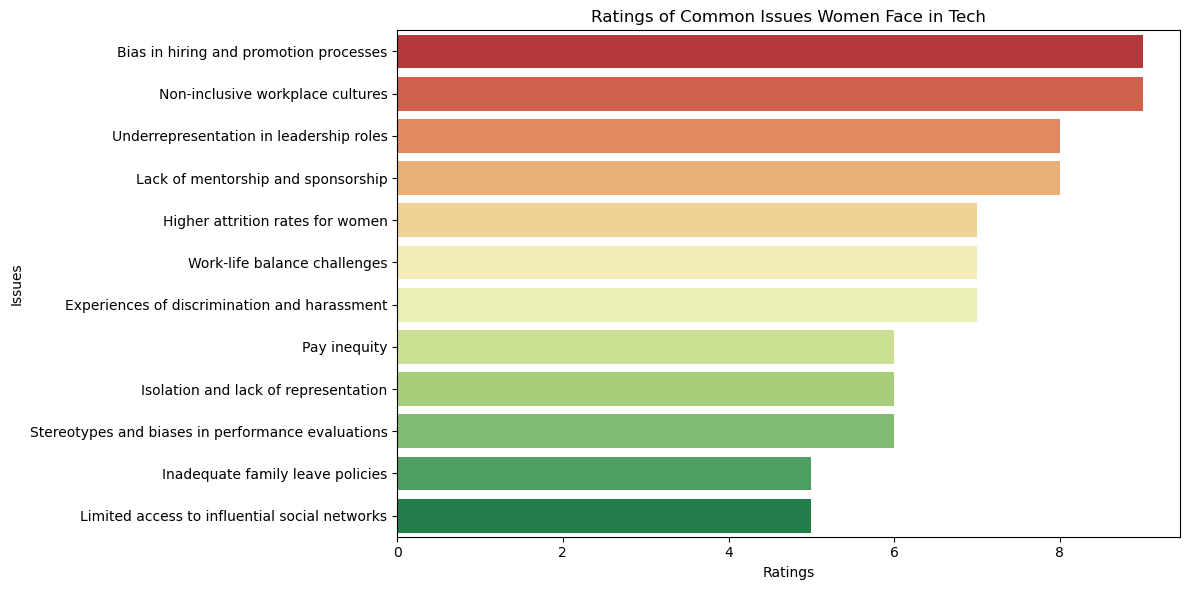

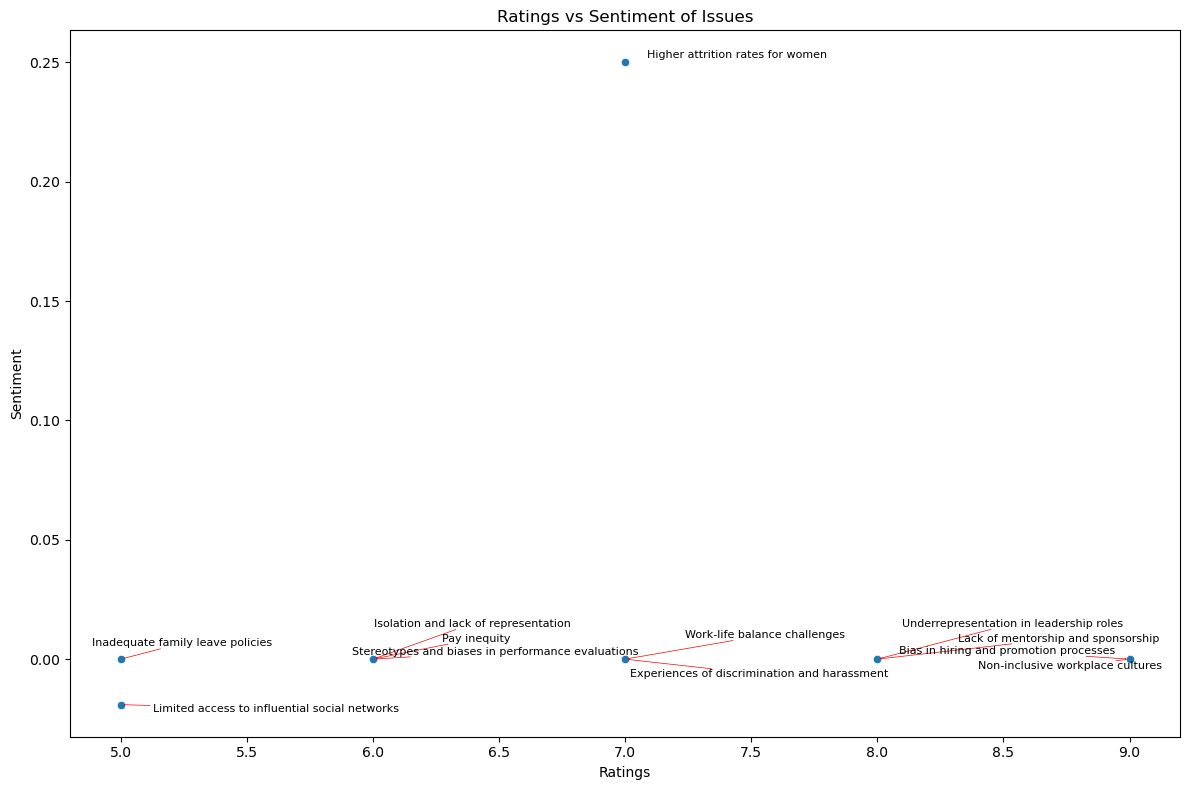


Common issues women face in the tech industry, their ratings, and sentiments:
1. Bias in hiring and promotion processes: 9.0/10, Sentiment: 0.00
2. Non-inclusive workplace cultures: 9.0/10, Sentiment: 0.00
3. Underrepresentation in leadership roles: 8.0/10, Sentiment: 0.00
4. Lack of mentorship and sponsorship: 8.0/10, Sentiment: 0.00
5. Higher attrition rates for women: 7.0/10, Sentiment: 0.25
6. Work-life balance challenges: 7.0/10, Sentiment: 0.00
7. Experiences of discrimination and harassment: 7.0/10, Sentiment: 0.00
8. Pay inequity: 6.0/10, Sentiment: 0.00
9. Isolation and lack of representation: 6.0/10, Sentiment: 0.00
10. Stereotypes and biases in performance evaluations: 6.0/10, Sentiment: 0.00
11. Inadequate family leave policies: 5.0/10, Sentiment: 0.00
12. Limited access to influential social networks: 5.0/10, Sentiment: -0.02


In [19]:
# Because of the sentiment analysis, I'm going to import TextBlob as it's used for processing textual data.
from textblob import TextBlob

# Perform sentiment analysis on the issues
issues_ratings['Sentiment'] = issues_ratings['Issues'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort issues by rating
issues_ratings = issues_ratings.sort_values('Ratings', ascending=False)

# Visualize the ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Ratings', y='Issues', data=issues_ratings, palette='RdYlGn', orient='h')
plt.title('Ratings of Common Issues Women Face in Tech')
plt.tight_layout()
plt.show()

# Ratings vs Sentiments scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ratings', y='Sentiment', data=issues_ratings)

texts = []
for _, row in issues_ratings.iterrows():
    texts.append(plt.text(row['Ratings'], row['Sentiment'], row['Issues'], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.title('Ratings vs Sentiment of Issues')
plt.xlabel('Ratings')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()

# Print issues, their ratings, and sentiments
print("\nCommon issues women face in the tech industry, their ratings, and sentiments:")
for _, row in issues_ratings.iterrows():
    print(f"{row['Issue_Number']}. {row['Issues']}: {row['Ratings']}/10, Sentiment: {row['Sentiment']:.2f}")

**Summary of Use Case 5 Analysis:**
    
Sentiment scores range from -1 to 1, where:
    
1 indicates a highly positive sentiment.

0 indicates a neutral sentiment.

-1 indicates a highly negative sentiment.

Additionally, the ratings are on a scale of 1 to 10, with 10 being the most severe or significant issue and 1 being the least severe. Higher ratings indicate that these issues are considered more severe or prevalent in the tech industry for women.

Therefore, the severity ratings show that issues like bias in hiring, non-inclusive cultures, and underrepresentation in leadership roles are among the most critical challenges for women in tech. Most of these issues have neutral sentiment scores, suggesting objective discussions. However, the slightly positive sentiment for higher attrition rates for women could indicate some hope for improvement, while the slightly negative sentiment for limited access to influential social networks reflects ongoing frustration.

**Final Summary**

Key Findings:

1. Top companies with female tech workers: IBM, Microsoft, Amazon, Google, Intel.

2. Highest % female tech workers: Slack, Intuit, LinkedIn, PayPal, Pinterest.

3. Female leadership: Slack (45%), Pinterest (40%).

4. Best retention: Slack (78%), Salesforce (75%), LinkedIn (74%).

5. University partnerships link to higher STEM hiring.

6. Diversity programs boost female recruitment and retention.

7. Main challenges: bias, non-inclusive culture, lack of mentorship, and underrepresentation in leadership.
    
Recommendations:
    
1. Mentorship & community programs

2. Fair hiring & promotion practices

3. Inclusive workplace culture

4. More women in leadership roles

5. Showcase female role models

6. University partnerships

7. Retention strategies (pay equity, flexibility)

8. Industry-wide collaboration



**Finally, I looked at big tech companies and found that women make up only 25-40% of tech jobs. There aren't many women leaders in these companies. Some are trying to help with special programs, but the tech world still needs to change a lot. The biggest problems are unfair hiring and promotion practices, and workplace cultures that don't make everyone feel welcome. We need to fix these issues to make tech careers better for women.**